In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, log_loss
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from tqdm import tqdm
import numpy as np
import json as js
import cv2 as cv
import warnings
from sklearn.exceptions import FitFailedWarning
import joblib
import os
import cv2
import random
from imgaug import augmenters as iaa


In [3]:
# Define paths
input_folder = "C:/Users/Lenovo/Jupyter Notebook Files/Model A/First Term Model A/StainedModel/StainedModel/Dataset"
output_folder = "C:/Users/Lenovo/Jupyter Notebook Files/Model A/First Term Model A/StainedModel/StainedModel/Augmented Dataset"

# Define augmentation sequence
augmentation_seq = iaa.Sequential([
    iaa.Affine(rotate=(-45, 45)),  # rotate images between -45 to 45 degrees
    iaa.Affine(scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}),  # zoom in/out
    iaa.Fliplr(0.5),  # horizontally flip 50% of images
    iaa.Flipud(0.5),  # vertically flip 50% of images
    iaa.Multiply((0.8, 1.2)),  # adjust brightness (multiply pixel values)
    iaa.contrast.LinearContrast((0.8, 1.2)),
    iaa.GaussianBlur(sigma=(0.0, 1.0)),  # blur images
    iaa.Sharpen(alpha=(0.0, 1.0), lightness=(0.75, 1.5))  # sharpen images
])

# Create output directory if not exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Define classes and their respective folders
classes = {
    "0 No Staining": os.path.join(output_folder, "0 No Staining"),
    "1 Pale Blue": os.path.join(output_folder, "1 Pale Blue"),
    "2 Dark Blue": os.path.join(output_folder, "2 Dark Blue")
}

# Function to perform data augmentation
def augment_images(input_images, output_folder, target_total_images_per_class):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    while len(os.listdir(output_folder)) < target_total_images_per_class:
        for img_path in input_images:
            img = cv2.imread(img_path)
            filename = os.path.basename(img_path)
            name, ext = os.path.splitext(filename)
            # Augment the image
            augmented_img = augmentation_seq.augment_image(img)
            # Add a unique identifier to the filename to avoid overwriting
            output_path = os.path.join(output_folder, f"{name}_{len(os.listdir(output_folder))}{ext}")
            cv2.imwrite(output_path, augmented_img)

# Determine the target number of augmented images per class
target_total_images_per_class = 120

# Loop through each class folder
for class_name, class_folder in classes.items():
    # Get list of images in the class folder
    images = os.listdir(os.path.join(input_folder, class_name))
    # Perform data augmentation until the target is reached
    augment_images([os.path.join(input_folder, class_name, img) for img in images], class_folder, target_total_images_per_class)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os



dataset_path = os.listdir('C:/Users/Lenovo/Jupyter Notebook Files/Model A/First Term Model A/StainedModel/StainedModel/Augmented Dataset')

types = os.listdir('C:/Users/Lenovo/Jupyter Notebook Files/Model A/First Term Model A/StainedModel/StainedModel/Augmented Dataset')
print (types)  #what kinds of classes are in this dataset

print("Types of classes found: ", len(dataset_path))

data = []

for item in types:
 # Get all the file names
 all_images = os.listdir('C:/Users/Lenovo/Jupyter Notebook Files/Model A/First Term Model A/StainedModel/StainedModel/Augmented Dataset' + '/' +item)


 # Add them to the list
 for image in all_images:
    data.append((item, str('C:/Users/Lenovo/Jupyter Notebook Files/Model A/First Term Model A/StainedModel/StainedModel/Augmented Dataset' + '/' +item) + '/' + image))
    

# Build a dataframe
images_df = pd.DataFrame(data=data, columns=['Colour', 'image'])

# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(images_df))

img_count = images_df['Colour'].value_counts()

print("Images in each category: ")
print(img_count)

['0 No Staining', '1 Pale Blue', '2 Dark Blue']
Types of classes found:  3
Total number of images in the dataset:  370
Images in each category: 
1 Pale Blue      130
0 No Staining    120
2 Dark Blue      120
Name: Colour, dtype: int64


In [5]:
### load augmented imgs ###
import cv2
path = "C:/Users/Lenovo/Jupyter Notebook Files/Model A/First Term Model A/StainedModel/StainedModel/Augmented Dataset/"


im_size = 300

images = []
labels = []

for i in types:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path) ]

    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [6]:
images = np.array(images)

images = images.astype('float32') / 255.0
before = images.shape
print("Before flatten" , before)

images = images.reshape(images.shape[0], -1)
after = images.shape
print("After flatten" , after)

#having 360  images of size 300x300 of 3 //rgb colors (5, 300, 300, 3)

Before flatten (370, 300, 300, 3)
After flatten (370, 270000)


In [7]:
### Convert y (labels) into 0,1,2 ###
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

y=images_df['Colour'].values
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [10]:
### SVM Model ###
### Hyper Tuning to get the best params###
warnings.filterwarnings("ignore", category=FitFailedWarning)

### create the set of parameters to test ###
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'poly', 'sigmoid']}

### init the grid search ###
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit=True, verbose=3)

### start the grid search ###
grid.fit(images, y)

print(grid.best_params_)


Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.351 total time=  44.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.351 total time=  45.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.351 total time= 1.0min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.351 total time=  48.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.351 total time=  55.2s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.662 total time=  12.9s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.270 total time=   8.8s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.608 total time=  11.6s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.851 total time=  10.9s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.689 total time=   8.3s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.324 total time=  17.5s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

[CV 2/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.351 total time=  14.3s
[CV 3/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.351 total time=  15.4s
[CV 4/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.351 total time=  14.3s
[CV 5/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.351 total time=  14.6s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.351 total time=  39.5s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.351 total time=  42.7s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.351 total time=  44.3s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.351 total time=  46.1s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.351 total time=  41.3s
[CV 1/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.662 total time=  11.6s
[CV 2/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.270 total time=   9.1s
[CV 3/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.608 total time=  15.9s
[CV 4/5] END ......C=1, gamm

[CV 4/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.851 total time=  11.3s
[CV 5/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.689 total time=   8.5s
[CV 1/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.351 total time=  15.9s
[CV 2/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.351 total time=  15.8s
[CV 3/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.351 total time=  16.3s
[CV 4/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.351 total time=  16.1s
[CV 5/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.351 total time=  24.8s
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.784 total time=  44.1s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.324 total time=  40.6s
[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.797 total time=  37.7s
[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.851 total time=  43.2s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.622 total time=  39.7s
[CV 1/5] END ...C=10, gamma=

[CV 1/5] END ......C=1000, gamma=1, kernel=poly;, score=0.662 total time=  11.8s
[CV 2/5] END ......C=1000, gamma=1, kernel=poly;, score=0.270 total time=   8.7s
[CV 3/5] END ......C=1000, gamma=1, kernel=poly;, score=0.608 total time=  13.3s
[CV 4/5] END ......C=1000, gamma=1, kernel=poly;, score=0.851 total time=  14.9s
[CV 5/5] END ......C=1000, gamma=1, kernel=poly;, score=0.689 total time=  10.4s
[CV 1/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.351 total time=  19.3s
[CV 2/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.351 total time=  17.2s
[CV 3/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.351 total time=  19.5s
[CV 4/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.351 total time=  16.7s
[CV 5/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.351 total time=  15.8s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.351 total time=  39.7s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.351 total time=  40.4s
[CV 3/5] END .....C=1000, ga

In [8]:
### init the model ###
model = SVC(C=10, gamma=0.0001, kernel='rbf')

In [9]:
### split db ###
### train test split ###
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.2)

### train the model ###
model.fit(X_train, y_train)

### predict ###
label_prediction = model.predict(X_test)

### test the model ###
accuracy = accuracy_score(y_test, label_prediction)
print("SVM accuracy",accuracy )



SVM accuracy 0.7432432432432432


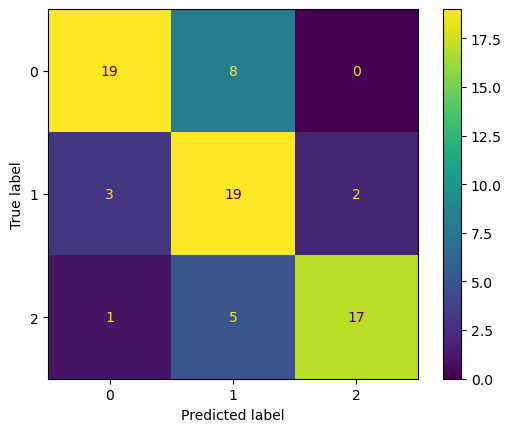

In [10]:
### confusion matrix ###
cm = confusion_matrix(y_test, label_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0", "1", "2"])
disp.plot()
plt.show()

In [12]:
### load test image and train on model ###

# Load the new image
#X_path = "C:/Users/Lenovo/Jupyter Notebook Files/Model A/First Term Model A/StainedModel/StainedModel/TEST/nostainTest.jpg"
# X_path = "C:/Users/Lenovo/Jupyter Notebook Files/Model A/First Term Model A/StainedModel/StainedModel/TEST/test.jpg"
#X_path = "C:/Users/Lenovo/Jupyter Notebook Files/Model A/First Term Model A/StainedModel/StainedModel/TEST/darkTest.jpg"

X = cv2.imread(X_path)

# Ensure the new image has the same size as the images used for training
X = cv2.resize(X, (300, 300))

# Flatten the image
X = X.reshape(1, -1)

# Normalize the pixel values
X = X.astype('float32') / 255.0

# Predict using the SVM model
label_prediction = model.predict(X)
print(f"label_prediction: {label_prediction}")

label_prediction: [0]
